In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics as s
from sklearn.impute import KNNImputer
## Will delete if not req
from numpy import math

In [2]:
##used to ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install imbalanced-learn
!pip install smote-variants

     |████████████████████████████████| 134 kB 6.7 MB/s 
  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=ca3c71fe7f048ddfad6505616c25c0d442b9f2701f4c7dd8e71e59ceb5fbc506
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7452 sha256=d55764fba9fb5bc35551cb4d269053ee65e65435e1d300504e3f19d716d88dbc
  Stored in directory: /root/.cache/pip/wheels/37/09/e1/49ee45c0ce248a6e9c986aae82d32bbcba09c9f3b9d0c3406a
Successfully built minisom statistics


In [5]:
import smote_variants as sv

In [6]:
data = pd.read_csv("/content/drive/MyDrive/Almabetter learning/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv")
print("Dataset size")
print("Rows {} Columns {}".format(data.shape[0], data.shape[1]))

Dataset size
Rows 3390 Columns 17


In [7]:
data.sample(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3315,3315,60,2.0,F,YES,20.0,0.0,0,0,0,260.0,139.0,81.0,24.68,74.0,70.0,0
2032,2032,66,1.0,F,NO,0.0,0.0,0,1,0,285.0,166.0,98.0,26.04,95.0,132.0,0
1097,1097,36,4.0,F,YES,10.0,0.0,0,0,0,214.0,119.0,76.0,21.67,67.0,75.0,0
1429,1429,48,3.0,F,YES,20.0,0.0,0,0,0,253.0,105.0,59.0,19.42,62.0,83.0,0
1688,1688,39,2.0,F,NO,0.0,0.0,0,0,0,190.0,120.0,80.0,27.16,70.0,85.0,0


In [8]:
# Id dropped as not req
data.drop(columns=['id'],inplace=True)

In [9]:
data.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

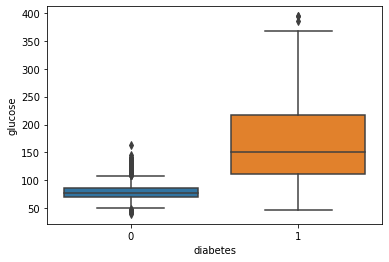

In [10]:
sns.boxplot(data=data,x='diabetes',y='glucose');

In [11]:
data[data['glucose'].isna()]['diabetes'].value_counts()

0    301
1      3
Name: diabetes, dtype: int64

In [12]:
data.loc[(data['glucose'].isna()) & (data['diabetes']==0) ,['glucose'] ]=data[data['diabetes']==0]['glucose'].median()
data.loc[(data['glucose'].isna()) & (data['diabetes']==1) ,['glucose'] ]=data[data['diabetes']==1]['glucose'].median()

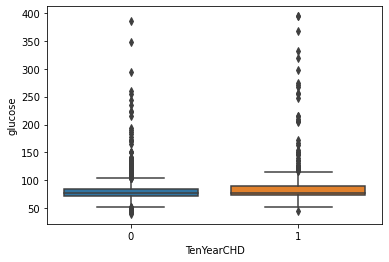

In [13]:
sns.boxplot(data=data,x='TenYearCHD',y='glucose');

Data Analysis

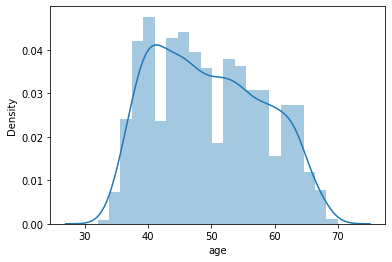

In [14]:
sns.distplot(data['age']);

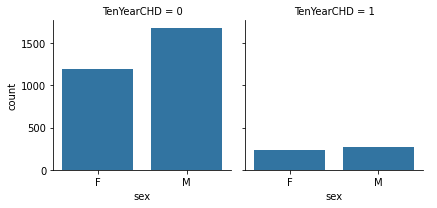

In [15]:
fct=sns.FacetGrid(data=data,col='TenYearCHD')
# map the above form facetgrid with some attributes
fct.map(sns.countplot,'sex').add_legend()
# show the object
plt.show()

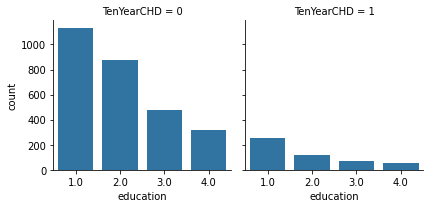

In [16]:

fct=sns.FacetGrid(data=data,col='TenYearCHD')
# map the above form facetgrid with some attributes
fct.map(sns.countplot,'education').add_legend()
# show the object
plt.show()

In [17]:
data['education'].describe()

count    3303.000000
mean        1.970936
std         1.019081
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

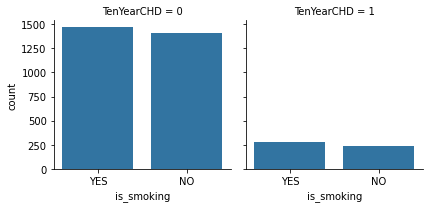

In [18]:
fct=sns.FacetGrid(data=data,col='TenYearCHD')
# map the above form facetgrid with some attributes
fct.map(sns.countplot,'is_smoking').add_legend()
# show the object
plt.show()

In [19]:
data['prevalentStroke'].describe()

count    3390.000000
mean        0.006490
std         0.080309
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: prevalentStroke, dtype: float64

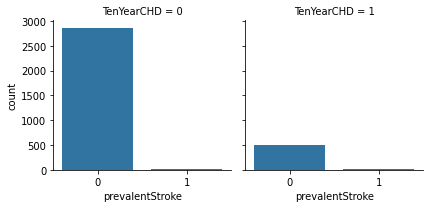

In [20]:
fct=sns.FacetGrid(data=data,col='TenYearCHD')
# map the above form facetgrid with some attributes
fct.map(sns.countplot,'prevalentStroke').add_legend()
# show the object
plt.show()

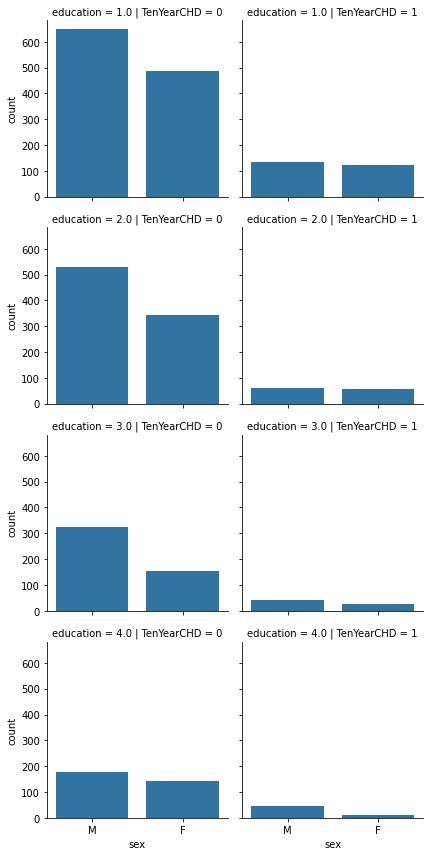

In [21]:
fct=sns.FacetGrid(data=data,col='TenYearCHD',row='education')
# map the above form facetgrid with some attributes
fct.map(sns.countplot,'sex').add_legend()
# show the object
plt.show()

In [22]:
data[['sysBP','diaBP','BMI','heartRate','glucose']].describe()

,sysBP,diaBP,BMI,heartRate,glucose
count,3390.00000,3390.000000,3376.000000,3389.000000,3390.000000
mean,132.60118,82.883038,25.794964,75.977279,81.783776
std,22.29203,12.023581,4.115449,11.971868,23.249836
min,83.50000,48.000000,15.960000,45.000000,40.000000
25%,117.00000,74.500000,23.020000,68.000000,72.000000
50%,128.50000,82.000000,25.380000,75.000000,78.000000
75%,144.00000,90.000000,28.040000,83.000000,85.000000
max,295.00000,142.500000,56.800000,143.000000,394.000000


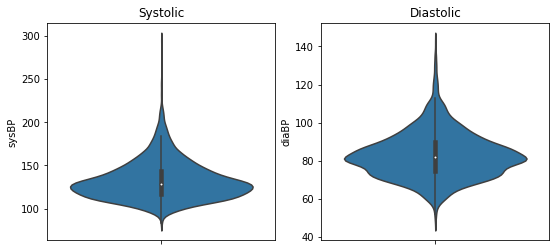

In [23]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.violinplot(data=data,y='sysBP')
plt.title("Systolic")
plt.subplot(1,2,2)
sns.violinplot(data=data,y='diaBP',)
plt.title("Diastolic")
#plt.legends()
plt.show()

In [24]:
data.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [25]:
data[data['sysBP']==max(data['sysBP'])]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1941,64,1.0,F,NO,0.0,0.0,0,1,0,253.0,295.0,135.0,38.82,92.0,70.0,1


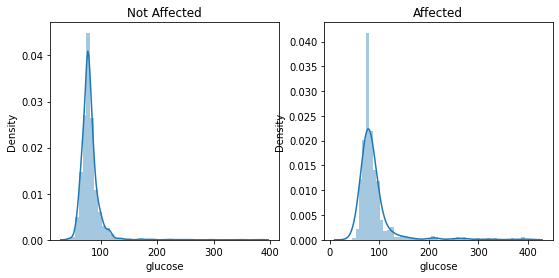

In [26]:
#sns.distplot(data['glucose']);
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.distplot(data[data['TenYearCHD']==0]['glucose']);
plt.title("Not Affected")
plt.subplot(1,2,2)
sns.distplot(data[data['TenYearCHD']==1]['glucose']);
plt.title("Affected")
#plt.legends()
plt.show()

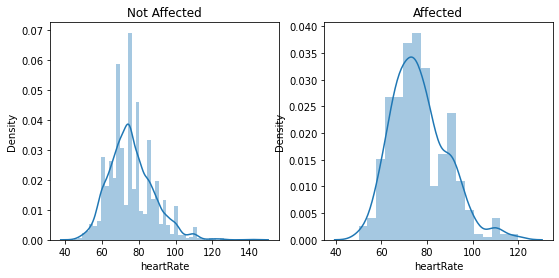

In [27]:
#sns.distplot(data['glucose']);
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.distplot(data[data['TenYearCHD']==0]['heartRate']);
plt.title("Not Affected")
plt.subplot(1,2,2)
sns.distplot(data[data['TenYearCHD']==1]['heartRate']);
plt.title("Affected")
#plt.legends()
plt.show()

Handling Null Values

In [28]:
# Imputed null values with mode
data['BPMeds']=data['BPMeds'].fillna(s.mode(data['BPMeds']))

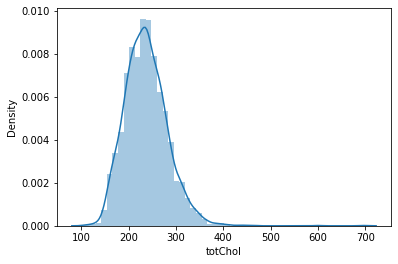

In [29]:
sns.distplot(data['totChol']);

In [30]:
# Less than 400 almost Normal, impute with mean
data['totChol']=data['totChol'].fillna(np.mean(data[data['totChol']<=400]['totChol']))

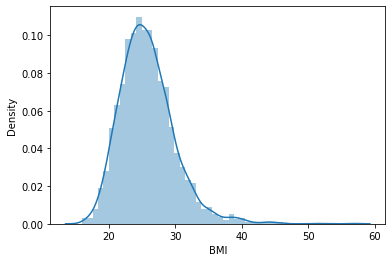

In [31]:
sns.distplot(data['BMI']);

In [32]:
# Less than 36 almost Normal, impute with mean
data['BMI']=data['BMI'].fillna(np.mean(data[data['BMI']<=36]['BMI']))

In [33]:
## CigsPerDay 22 nulls needs imputation as is_smoking is yes all 22 records
data[(data.cigsPerDay.isna()) & (data.is_smoking!='YES')]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


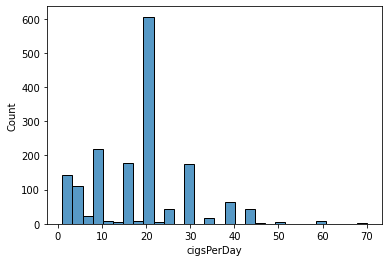

In [34]:
#data['cigsPerDay'].value_counts()

sns.histplot(data[data['cigsPerDay']!=0]['cigsPerDay'],bins=30);
## Bar plot gives an idea about what count of cigsperday is observed in more numbers

In [35]:
data['cigsPerDay']=data['cigsPerDay'].fillna(np.random.randint(5,30))

In [36]:
data['heartRate']=data['heartRate'].fillna(np.mean(data['heartRate']))

In [37]:
data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.500835,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [38]:
# Encoding this categorical to prepare data for KNN impute
data['is_smoking']=data['is_smoking'].apply(lambda x:1 if x=='YES' else 0)
data['sex']=data['sex'].apply(lambda x:1 if x=='M' else 0)

In [39]:
#data.drop(['glucose'],inplace=True,axis=1)

In [40]:
data.isna().sum()

age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [41]:
#data[data['glucose'].isna()]
# define imputer
imputer = KNNImputer(n_neighbors=10, weights='uniform', metric='nan_euclidean')

In [42]:
# fit on the dataset
imputer.fit(data)

KNNImputer(n_neighbors=10)

In [43]:
# transform the dataset
data_trans = pd.DataFrame(imputer.transform(data),columns=data.columns)

In [44]:
data_trans.isna().sum().sum()

0

In [45]:
data_trans.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,25.500835,90.0,80.0,1.0
1,36.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,212.0,168.0,98.0,29.770000,72.0,75.0,0.0
2,46.0,1.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.350000,88.0,94.0,0.0
3,50.0,1.0,1.0,1.0,20.0,0.0,0.0,1.0,0.0,233.0,158.0,88.0,28.260000,68.0,94.0,1.0
4,64.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.420000,70.0,77.0,0.0


In [46]:
data=data_trans.copy()

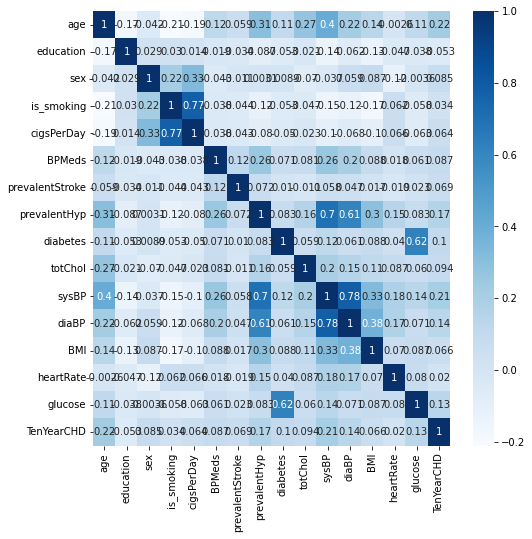

In [47]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

In [48]:
X=data.drop(['TenYearCHD'],axis=1).values
y=data['TenYearCHD'].values

In [49]:
type(y)
#y.iloc[[220, 77, 324, 462, 328],:]

numpy.ndarray

In [50]:
oversampler= sv.distance_SMOTE()
X_msmote, y_msmote= oversampler.sample(X, y)

2021-12-21 19:09:09,379:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [51]:
data.columns[-1]

'TenYearCHD'

In [52]:
data_new=pd.DataFrame(X_msmote,columns=data.columns[:-1])
data_new['TenYearCHD']=pd.DataFrame(y_msmote)
data_new['TenYearCHD'].value_counts()

0.0    2879
1.0    2879
Name: TenYearCHD, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.model_selection import cross_validate,RepeatedStratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [54]:
X=data_new.drop(['TenYearCHD'],axis=1)
y=data_new['TenYearCHD']

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
#logistic = LogisticRegression(C=10.0,penalty='l2',random_state=30, solver='lbfgs',)
logistic = LogisticRegression(random_state=30)

In [58]:
scoring = ['roc_auc']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ................. roc_auc: (train=0.757, test=0.726) total time=   0.0s
[CV] START .....................................................................
[CV] END ................. roc_auc: (train=0.744, test=0.762) total time=   0.0s
[CV] START .....................................................................
[CV] END ................. roc_auc: (train=0.754, test=0.729) total time=   0.0s
[CV] START .....................................................................
[CV] END ................. roc_auc: (train=0.754, test=0.725) total time=   0.0s
[CV] START .....................................................................
[CV] END ................. roc_auc: (train=0.742, test=0.778) total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [59]:
logistic.fit(X_train,y_train)

LogisticRegression(random_state=30)

In [60]:
# Get the predicted probabilities
train_preds = logistic.predict_proba(X_train)
test_preds = logistic.predict_proba(X_test)

In [61]:
train_preds_df=pd.DataFrame(train_preds,columns=['No','Yes'])
train_preds=np.array(train_preds_df['Yes'])

In [62]:
test_preds_df=pd.DataFrame(test_preds,columns=['No','Yes'])
test_preds=np.array(test_preds_df['Yes'])

In [63]:
from sklearn.metrics import roc_curve,precision_recall_curve

Best Threshold=0.483659, G-Mean=0.695


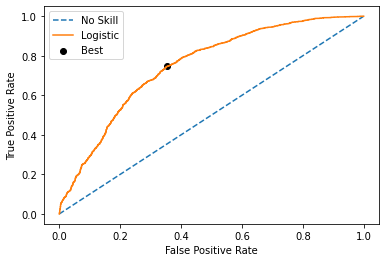

In [64]:
## Calculate optimal threshold using roc_curve method
fpr, tpr, thresholds = roc_curve(y_train, train_preds)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Logistic')# marker='.'
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [65]:
# precision, recall, thresholds = precision_recall_curve(y_test, test_preds)
# # plot the roc curve for the model
# no_skill = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
# plt.plot(recall, precision, marker='.', label='Logistic')
# # axis labels
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.legend()
# # show the plot
# plt.show()


# # convert to f score
# fscore = (2 * precision * recall) / (precision + recall)
# # locate the index of the largest f score
# ix = np.argmax(fscore)
# print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

In [66]:
## Calculate optimal threshold using precision-recall curve method

In [67]:
#test_preds_new=np.array(test_preds_df['Yes'].apply(lambda x:1 if x>=0.501637 else 0))
test_preds_new=np.array(test_preds_df['Yes'].apply(lambda x:1 if x>=thresholds[ix] else 0))

[[455 282]
 [201 502]]


[Text(0, 0.5, 'Not at Risk'), Text(0, 1.5, 'Heart Risk')]

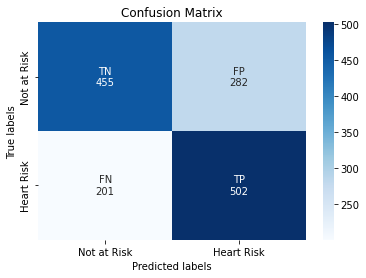

In [68]:
# Get the confusion matrix for test

labels = ['Not at Risk','Heart Risk' ]
#cm = confusion_matrix(y_test, test_preds_new)
cm = confusion_matrix(y_test, test_preds_new)
print(cm)

cat = ['TN','FP','FN','TP']
#cat = np.asarray(labels2).reshape(2,2)
counts = [count for count in cm.flatten()]
labelsIn = [f"{v1}\n{v2}" for v1, v2 in  zip(cat,counts)]

labelsIn = np.asarray(labelsIn).reshape(2,2)

ax= plt.subplot()
sns.heatmap(cm, annot=labelsIn, ax = ax,fmt='', cmap='Blues');

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [69]:
## Calc Precision and recall
from sklearn.metrics import roc_auc_score,recall_score,precision_score

roc_auc = roc_auc_score(y_test, test_preds_new)


In [70]:
roc_auc

0.6657251052380666

In [71]:
precision = precision_score(y_test, test_preds_new)#, average='binary')
recall = recall_score(y_test, test_preds_new)#, average='binary')

In [72]:
print(precision)
print("\n")
print(recall)

0.6403061224489796


0.7140825035561877


In [73]:
print(2*precision*recall/(recall+precision))

0.675184936112979


In [74]:
############# Tuning

In [75]:
#X.drop(['is_smoking','education'],axis=1,inplace=True)

In [76]:
X['pulse']=X['sysBP']-X['diaBP']
X.drop(['sysBP','diaBP'],axis=1,inplace=True)

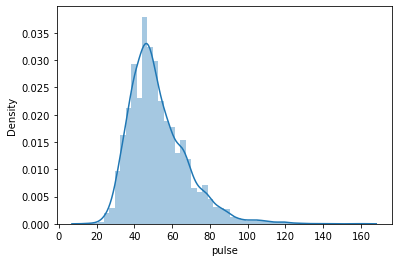

In [77]:
sns.distplot(X['pulse'])

In [78]:
len(X[X['pulse']<=25])
#len(X)

22

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
grid={
'C':[100, 10, 5,1.0, 0.1, 0.01],
'penalty':['none', 'l1', 'l2', 'elasticnet'],
'solver':['newton-cg', 'lbfgs', 'sag', 'saga']
}
logistic = LogisticRegression()

In [83]:
#from sklearn.metrics import make_scorer
# def weighted_f1(precision,recall):
#   beta=1
#   return ((1+beta**2)*precision*recall/(recall+(beta**2)*precision) )

# def model_scorer(estimator,X,y):
#   y_pr=estimator.predict(X)
#   precision = precision_score(y,y_pr)
#   recall = recall_score(y,y_pr)
#   return weighted_f1(precision,recall)

# weighted_f1_score = make_scorer(model_scorer)

In [84]:

logistic=LogisticRegression()
grid_search = GridSearchCV(estimator=logistic, param_grid=grid, n_jobs=-1, scoring='f1',cv=5,error_score=0)
grid_result = grid_search.fit(X_train, y_train)
#grid_result = GridSearchCV(estimator=logistic, param_grid=grid, n_jobs=-1, scoring=weighted_f1_score,error_score="raise").fit(X, y)

In [85]:
# import sklearn
# print(sorted(sklearn.metrics.SCORERS.keys()))

In [86]:
grid_result.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_penalty', 'param_solver', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [87]:
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']

In [88]:
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [89]:
C=grid_result.best_params_['C']
penalty=grid_result.best_params_['penalty']
solver=grid_result.best_params_['solver']
grid_result.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}

In [90]:
tuned_logistic=LogisticRegression(C=C, penalty=penalty,solver=solver,random_state=1)
tuned_logistic.fit(X_train,y_train)

LogisticRegression(penalty='l1', random_state=1, solver='saga')

In [91]:
# Get the predicted probabilities
train_preds = tuned_logistic.predict_proba(X_train)
test_preds = tuned_logistic.predict_proba(X_test)

In [92]:
## Calc threshold from training data
train_preds_df=pd.DataFrame(train_preds,columns=['No','Yes'])
train_preds=np.array(train_preds_df['Yes'])

In [93]:
 test_preds_df=pd.DataFrame(test_preds,columns=['No','Yes'])
 test_preds=np.array(test_preds_df['Yes'])

Best Threshold=0.487802, G-Mean=0.689


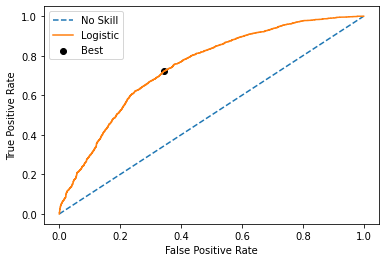

In [94]:
## Calculate optimal threshold using roc_curve method
fpr, tpr, thresholds = roc_curve(y_train, train_preds)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Logistic')# marker='.'
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [95]:
train_preds_new=np.array(train_preds_df['Yes'].apply(lambda x:1 if x>thresholds[ix] else 0))
test_preds_new=np.array(test_preds_df['Yes'].apply(lambda x:1 if x>thresholds[ix] else 0))

[Text(0, 0.5, 'Not at Risk'), Text(0, 1.5, 'Heart Risk')]

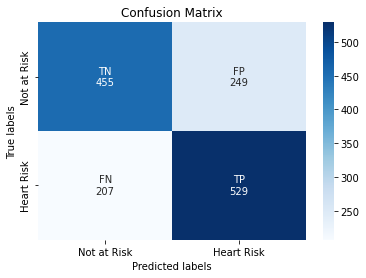

In [96]:
# Get the confusion matrix for test

labels = ['Not at Risk','Heart Risk' ]
cm = confusion_matrix(y_test, test_preds_new)

cat = ['TN','FP','FN','TP']
#cat = np.asarray(labels2).reshape(2,2)
counts = [count for count in cm.flatten()]
labelsIn = [f"{v1}\n{v2}" for v1, v2 in  zip(cat,counts)]

labelsIn = np.asarray(labelsIn).reshape(2,2)

ax= plt.subplot()
sns.heatmap(cm, annot=labelsIn, ax = ax,fmt='', cmap='Blues');

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [97]:
from sklearn.metrics import roc_auc_score,recall_score,precision_score

In [98]:
## Calc Precision and recall


roc_auc = roc_auc_score(y_test, test_preds_new)
print(roc_auc)
print("")

precision = precision_score(y_test, test_preds_new)
recall = recall_score(y_test, test_preds_new)
print(precision)
print(recall)
print(2*precision*recall/(recall+precision))
print("")
accuracy = accuracy_score(y_test, test_preds_new)
print(accuracy)

0.6825284090909091

0.6799485861182519
0.71875
0.6988110964332893

0.6833333333333333


# Ridge Classifier

In [99]:
from sklearn.linear_model import RidgeClassifier

In [102]:
rclf = RidgeClassifier(random_state=10).fit(X_train, y_train)

In [105]:
y_pred_ridge=rclf.predict(X_test)

0.682806324110672

0.6842105263157895
0.7065217391304348
0.6951871657754011

0.6833333333333333


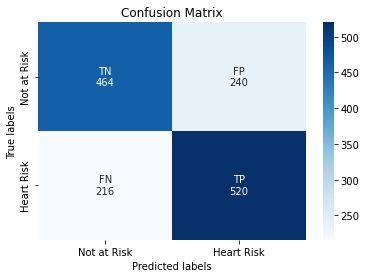

In [108]:
labels = ['Not at Risk','Heart Risk' ]
cm = confusion_matrix(y_test, y_pred_ridge)

cat = ['TN','FP','FN','TP']
#cat = np.asarray(labels2).reshape(2,2)
counts = [count for count in cm.flatten()]
labelsIn = [f"{v1}\n{v2}" for v1, v2 in  zip(cat,counts)]

labelsIn = np.asarray(labelsIn).reshape(2,2)

ax= plt.subplot()
sns.heatmap(cm, annot=labelsIn, ax = ax,fmt='', cmap='Blues');

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Calc Precision and recall
roc_auc = roc_auc_score(y_test, y_pred_ridge)
print(roc_auc)
print("")

precision = precision_score(y_test, y_pred_ridge)
recall = recall_score(y_test, y_pred_ridge)
print(precision)
print(recall)
print(2*precision*recall/(recall+precision))
print("")
accuracy = accuracy_score(y_test, y_pred_ridge)
print(accuracy)

In [120]:

from sklearn.model_selection import RepeatedStratifiedKFold

In [134]:
alpha = [0.01, 0.03,0.05, 0.1, 0.3, 0.5, 1.0,5.0,6.0,8.0,10.0,100]
#solver=['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga', 'lbfgs']
solver=['svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga', 'lbfgs']
# define grid search
grid = dict(alpha=alpha,solver=solver)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=rclf, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.740653 using {'alpha': 100, 'solver': 'saga'}


In [135]:
alpha=grid_result.best_params_['alpha']
solver=grid_result.best_params_['solver']
tuned_ridge= RidgeClassifier(alpha=alpha,solver=solver,random_state=10).fit(X_train,y_train)

In [136]:
y_pred_ridge=tuned_ridge.predict(X_test)

0.6807374011857708

0.6824769433465085
0.7038043478260869
0.6929765886287624

0.68125


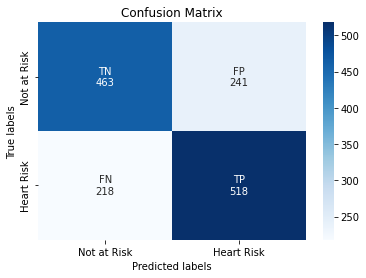

In [137]:
labels = ['Not at Risk','Heart Risk' ]
cm = confusion_matrix(y_test, y_pred_ridge)

cat = ['TN','FP','FN','TP']
#cat = np.asarray(labels2).reshape(2,2)
counts = [count for count in cm.flatten()]
labelsIn = [f"{v1}\n{v2}" for v1, v2 in  zip(cat,counts)]

labelsIn = np.asarray(labelsIn).reshape(2,2)

ax= plt.subplot()
sns.heatmap(cm, annot=labelsIn, ax = ax,fmt='', cmap='Blues');

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Calc Precision and recall
roc_auc = roc_auc_score(y_test, y_pred_ridge)
print(roc_auc)
print("")

precision = precision_score(y_test, y_pred_ridge)
recall = recall_score(y_test, y_pred_ridge)
print(precision)
print(recall)
print(2*precision*recall/(recall+precision))
print("")
accuracy = accuracy_score(y_test, y_pred_ridge)
print(accuracy)